In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction

## Import .csv file into DataFrame

Contained in the .csv file `data/g2g-hbv/to_fellay_manifest.csv`

In [2]:
ls

'Clinical data.ipynb'*        README.md*
 data/                        src/
 plink.frq.strat*            'Statistics notebook.ipynb'*
'Plink introduction.ipynb'*   str1.log*
 plink.log*                   tutorial/
'Python and Plink.ipynb'*


In [3]:
path = "data/g2g-hbv/to_fellay_manifest.csv"
df = pd.read_csv(path)
print(df.head(2))

      IGM_ID Viral_Sequencing_Status  AVG_COVERAGE              USUBJID  \
0  igm160234           Seq available         14150  GS-US-320-0108-1001   
1  igm160214           Seq available          8940  GS-US-320-0108-1002   

          STUDYID  SUBJID  Screening ID GT COUNTRY               ETHNICITY  \
0  GS-US-320-0108    1001           NaN  B     USA  NOT HISPANIC OR LATINO   
1  GS-US-320-0108    1002           NaN  C     USA  NOT HISPANIC OR LATINO   

   ... SEX   AGE  OAV_EXPERIENCE BASELINE_HBEAG_STATUS BASELINE_BMI  \
0  ...   M  52.0               N              Negative    25.968033   
1  ...   F  64.0               N              Negative    19.607157   

   BASELINE_ALT_U/L  BASELINE_HBSAG_log10_IU/mL  BASELINE_HBVDNA_IU/mL  \
0                45                    2.517934                 503000   
1                53                    2.887071                 117000   

  BASELINE_HBVDNA_Dil_IU/mL            gilead_id  
0                       NaN  GS-US-320-0108-1001  


In [4]:
df.shape
print(df.columns)

Index(['IGM_ID', 'Viral_Sequencing_Status', 'AVG_COVERAGE', 'USUBJID',
       'STUDYID', 'SUBJID', 'Screening ID', 'GT', 'COUNTRY', 'ETHNICITY',
       'RACE', 'SEX', 'AGE', 'OAV_EXPERIENCE', 'BASELINE_HBEAG_STATUS',
       'BASELINE_BMI', 'BASELINE_ALT_U/L', 'BASELINE_HBSAG_log10_IU/mL',
       'BASELINE_HBVDNA_IU/mL', 'BASELINE_HBVDNA_Dil_IU/mL', 'gilead_id'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 21 columns):
IGM_ID                        725 non-null object
Viral_Sequencing_Status       725 non-null object
AVG_COVERAGE                  725 non-null int64
USUBJID                       725 non-null object
STUDYID                       725 non-null object
SUBJID                        725 non-null int64
Screening ID                  0 non-null float64
GT                            725 non-null object
COUNTRY                       725 non-null object
ETHNICITY                     725 non-null object
RACE                          725 non-null object
SEX                           725 non-null object
AGE                           724 non-null float64
OAV_EXPERIENCE                593 non-null object
BASELINE_HBEAG_STATUS         725 non-null object
BASELINE_BMI                  724 non-null float64
BASELINE_ALT_U/L              725 non-null int64
BASELINE_HBSAG_log10_IU/mL    725 non-null floa

# Univariate distributions exploration

## Value counts

### Ids

IGM_ID, USUBJID, STUDYID, SUBJID are not useful here. 

### Categorical variables

In [6]:
# Viral sequencing status
df[df.columns[1]].value_counts()

Seq available    725
Name: Viral_Sequencing_Status, dtype: int64

In [7]:
df['Screening ID'].value_counts()

Series([], Name: Screening ID, dtype: int64)

In [8]:
df['GT'].value_counts()

C                          391
D                          154
B                          124
A                           41
E                            7
F                            3
H                            2
G                            1
Mixed                        1
Mixed genotype detected      1
Name: GT, dtype: int64

In [9]:
df['COUNTRY'].value_counts()

KOR    138
HKG    127
CAN     96
USA     83
RUS     55
JPN     48
ROU     47
ITA     32
NZL     24
POL     22
AUS     15
GBR     14
TUR     11
SGP      6
FRA      3
ESP      2
BGR      2
Name: COUNTRY, dtype: int64

In [10]:
df['ETHNICITY'].value_counts()

NOT HISPANIC OR LATINO    721
NOT PERMITTED               3
HISPANIC OR LATINO          1
Name: ETHNICITY, dtype: int64

In [11]:
df['RACE'].value_counts()

ASIAN                                        534
WHITE                                        174
BLACK OR AFRICAN AMERICAN                     10
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER      5
OTHER                                          2
Name: RACE, dtype: int64

In [23]:
df['SEX'].value_counts()

M    459
F    266
Name: SEX, dtype: int64

In [13]:
df['OAV_EXPERIENCE'].value_counts()

N    459
Y    134
Name: OAV_EXPERIENCE, dtype: int64

In [14]:
df['BASELINE_HBEAG_STATUS'].value_counts()

Positive    438
Negative    287
Name: BASELINE_HBEAG_STATUS, dtype: int64

## Quantitative variables



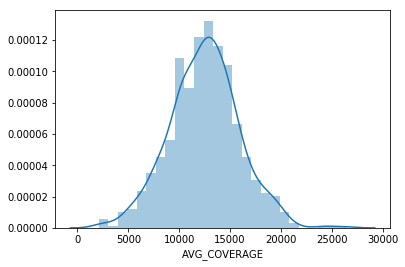

In [15]:
sns.distplot(df.AVG_COVERAGE);

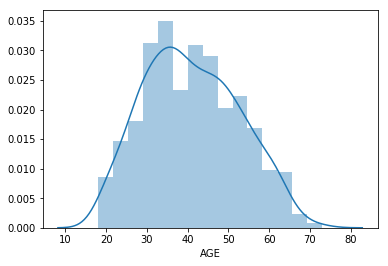

In [16]:
sns.distplot(df.AGE.dropna());

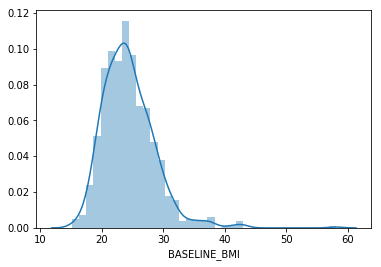

In [17]:
sns.distplot(df.BASELINE_BMI.dropna());

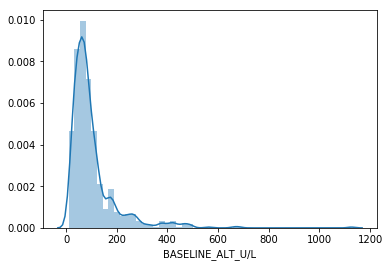

In [18]:
sns.distplot(df['BASELINE_ALT_U/L']);

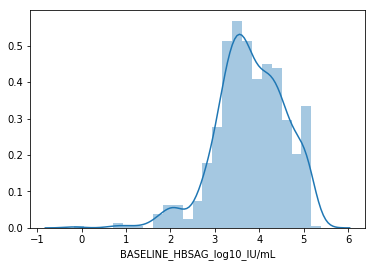

In [19]:
sns.distplot(df['BASELINE_HBSAG_log10_IU/mL']);

For ` BASELINE_HBVDNA_IU/mL` variable: integer values, except two values: `>110000000` and `>170000000`. We see that the majority of the individuals belong to one of the two 'string modalities'.

In [20]:
df['BASELINE_HBVDNA_IU/mL'].value_counts().head()

>110000000    220
>170000000     10
10600000        4
140000          3
105000          3
Name: BASELINE_HBVDNA_IU/mL, dtype: int64

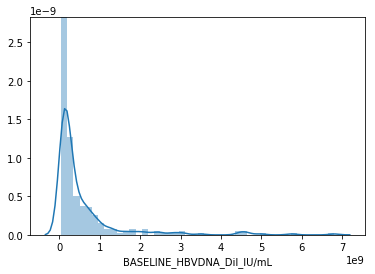

In [21]:
sns.distplot(df['BASELINE_HBVDNA_Dil_IU/mL'].dropna());

# Multivariate distributions exploration

## Age and sex

In [30]:
males = df[df.SEX == 'M']
print("Males:\t\tmean = {:.4}\tmedian = {}\tSD = {:.4}"
     .format(males.AGE.mean(), males.AGE.median(), males.AGE.std()))
females = df[df.SEX == 'F']
print("Females:\tmean = {:.4}\tmedian = {}\tSD = {:.4}"
     .format(females.AGE.mean(), females.AGE.median(), females.AGE.std()))

Males:		mean = 40.38	median = 39.0	SD = 11.3
Females:	mean = 42.0	median = 42.0	SD = 11.94


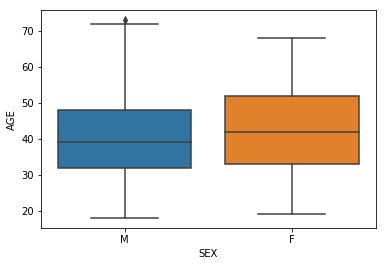

In [33]:
sns.boxplot(x='SEX', y='AGE', data=df);

## Country/race and age

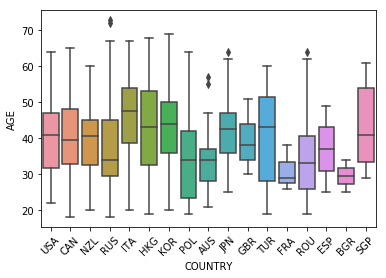

In [37]:
sns.boxplot(x='COUNTRY', y='AGE', data=df);
plt.xticks(rotation=45);

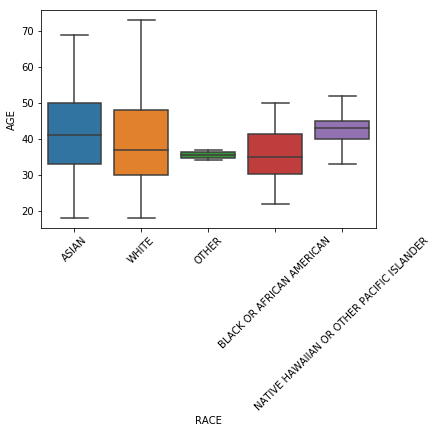

In [41]:
sns.boxplot(x='RACE', y='AGE', data=df);
plt.xticks(rotation=45);